In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report,accuracy_score
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

In [70]:
df=pd.read_csv('insurance.csv')

In [71]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [73]:
df.shape

(1338, 7)

In [74]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [75]:
df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [76]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [77]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [78]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [79]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [80]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [81]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [82]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [83]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [84]:
df.duplicated().sum()

1

In [85]:
duplicate_rows=df[df.duplicated(keep=False)]
duplicate_rows

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [86]:
df.drop(index=[581],inplace=True)

In [87]:
df.duplicated().sum()

0

Visualization

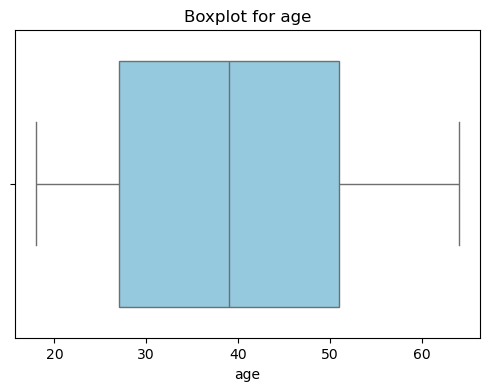

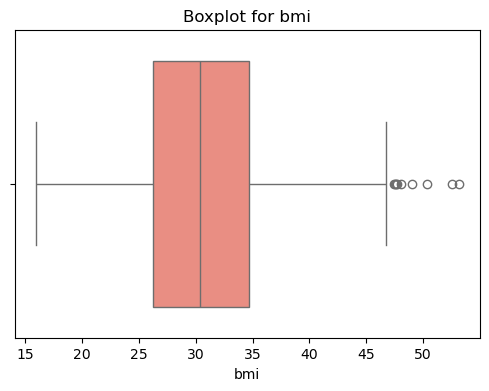

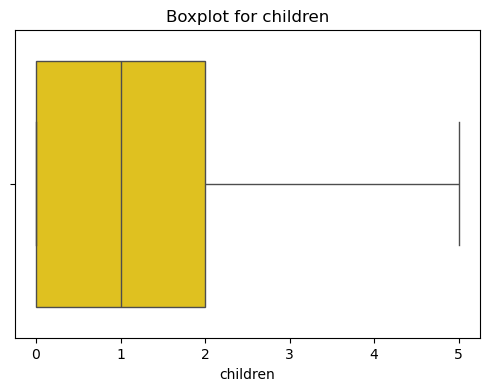

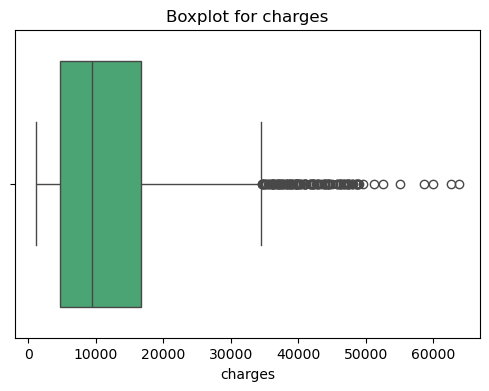

In [88]:
numerical_features = ['age', 'bmi', 'children', 'charges']
colors = ['skyblue', 'salmon', 'gold', 'mediumseagreen']

for feature, color in zip(numerical_features, colors):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature], color=color)
    plt.title(f'Boxplot for {feature}')
    plt.show()


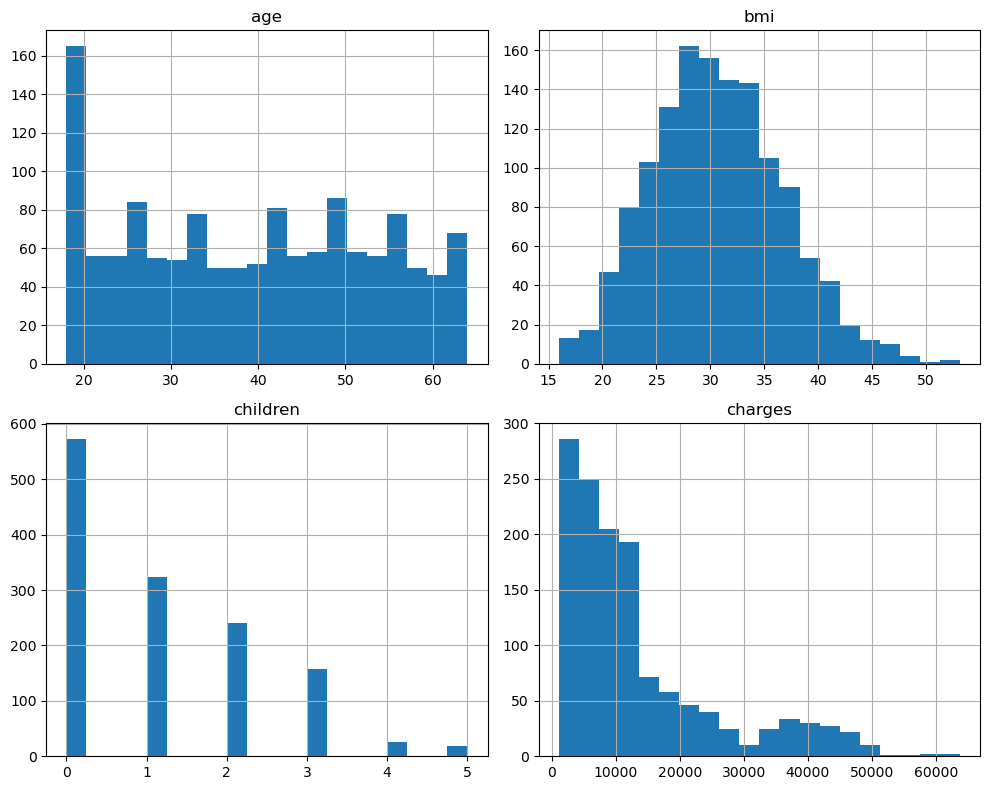

In [89]:
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

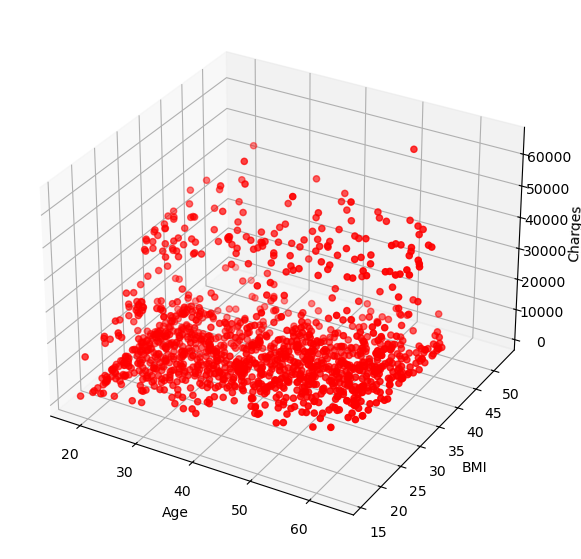

In [90]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['bmi'], df['charges'], c='r', marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
plt.show()

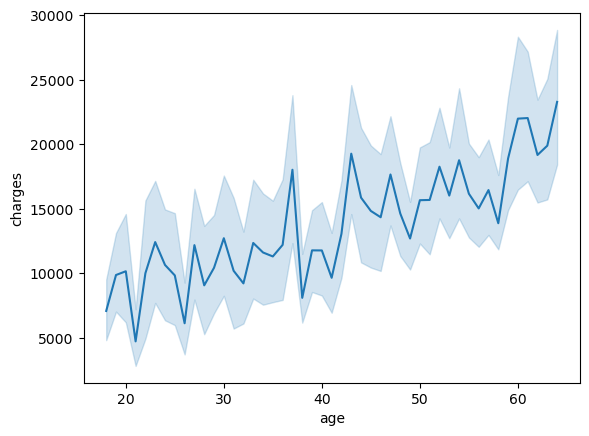

In [91]:
sns.lineplot(x=df['age'], y=df['charges'])
plt.show()


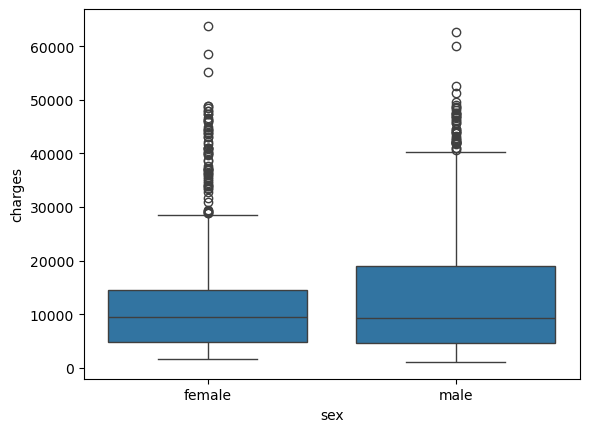

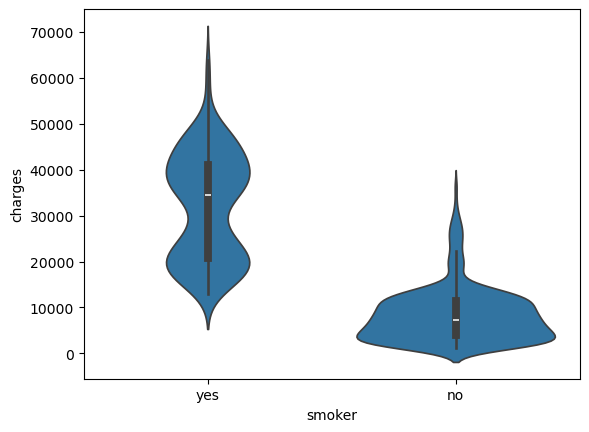

In [92]:
sns.boxplot(x=df['sex'], y=df['charges'])
plt.show()

sns.violinplot(x=df['smoker'], y=df['charges'])
plt.show()


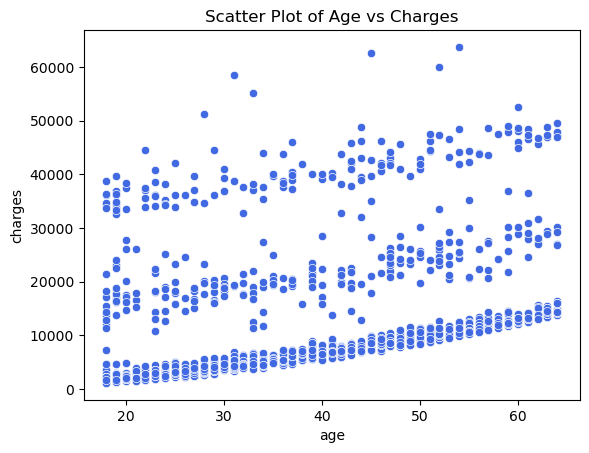

In [93]:
sns.scatterplot(x='age', y='charges', data=df, color='royalblue')
plt.title('Scatter Plot of Age vs Charges')
plt.show()

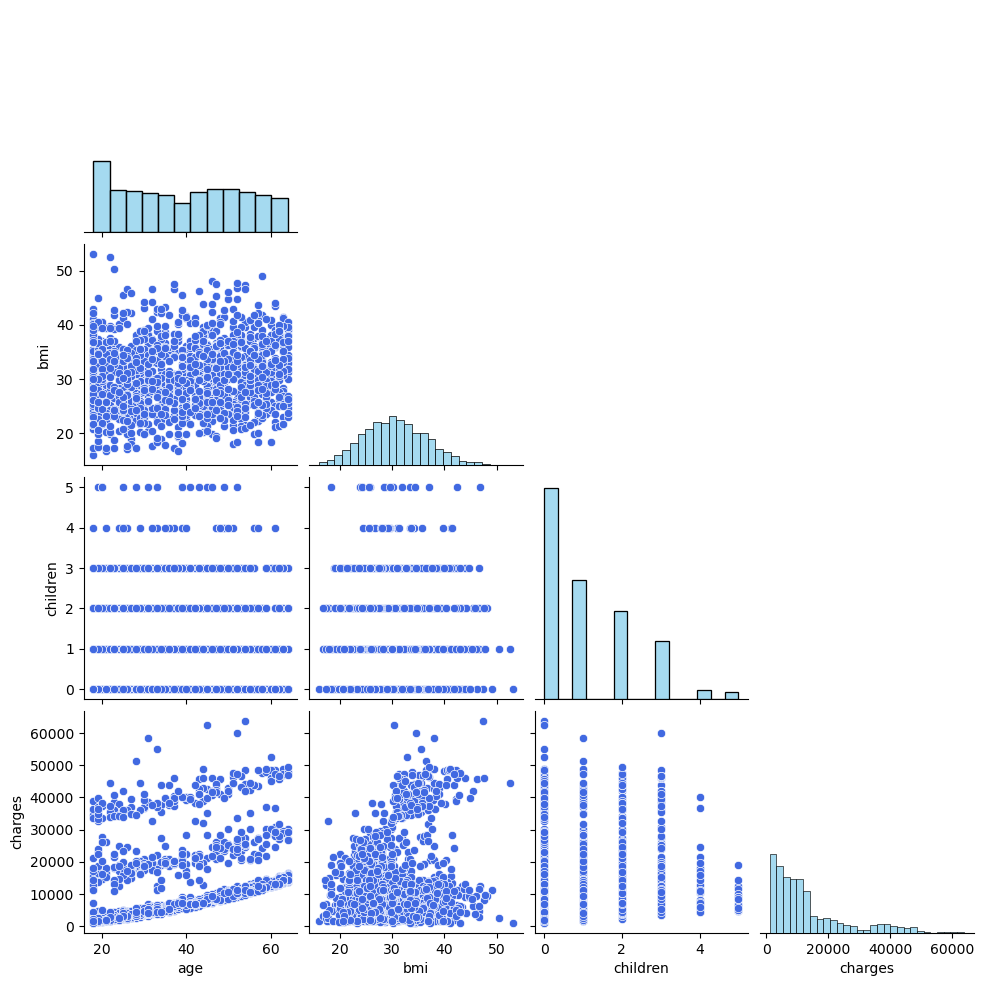

In [94]:
sns.pairplot(df[['age', 'bmi', 'children', 'charges']], corner=True, diag_kws={'color': 'skyblue'}, plot_kws={'color': 'royalblue'})
plt.show()

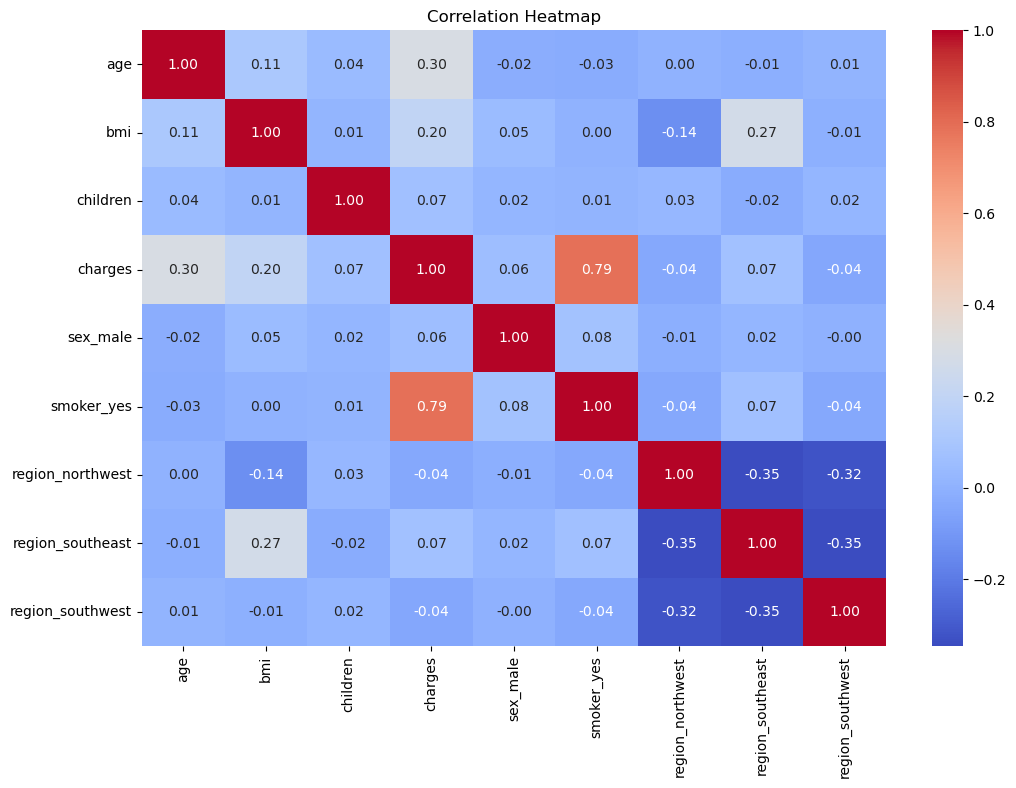

In [95]:
df_encoded = pd.get_dummies(df, drop_first=True)

corr_matrix = df_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [96]:
pd.crosstab(df['smoker'], df['sex'], margins=True)

sex,female,male,All
smoker,,,
no,547,516,1063
yes,115,159,274
All,662,675,1337


In [97]:
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

print(df.groupby('sex')['charges'].mean())
print(df.groupby('smoker')['charges'].mean())
print(df.groupby('region')['charges'].mean())

sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64
smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64
region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


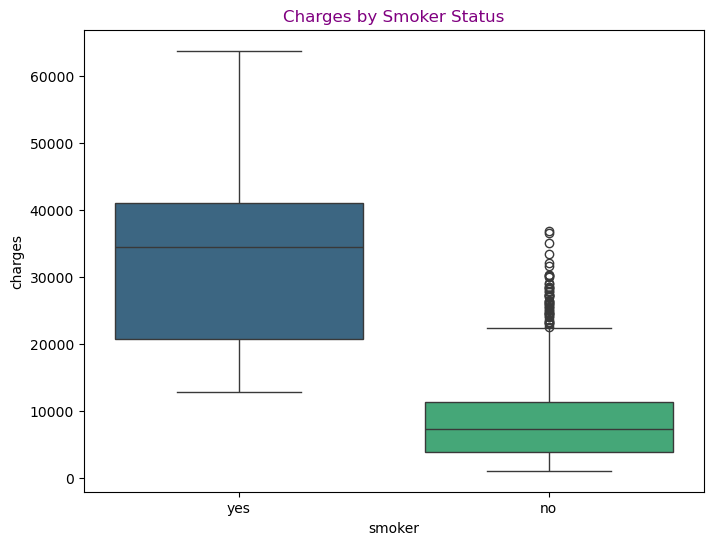

In [98]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', hue='smoker', data=df, palette='viridis', dodge=False)
plt.title('Charges by Smoker Status', color='purple')
plt.legend([], [], frameon=False)
plt.show()

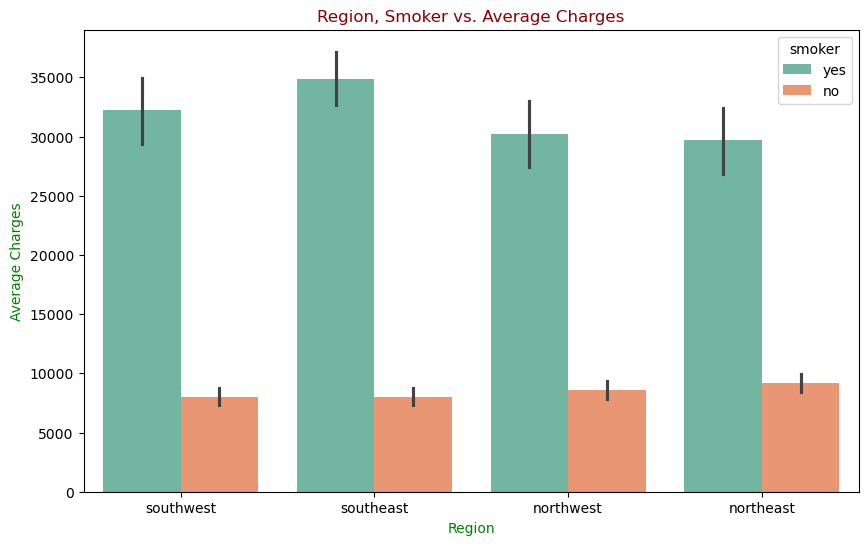

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='Set2')
plt.title('Region, Smoker vs. Average Charges', color='darkred')
plt.xlabel('Region', color='green')
plt.ylabel('Average Charges', color='green')
plt.show()


   age age_group
0   19     18-30
1   18       NaN
2   28     18-30
3   33     30-40
4   32     30-40


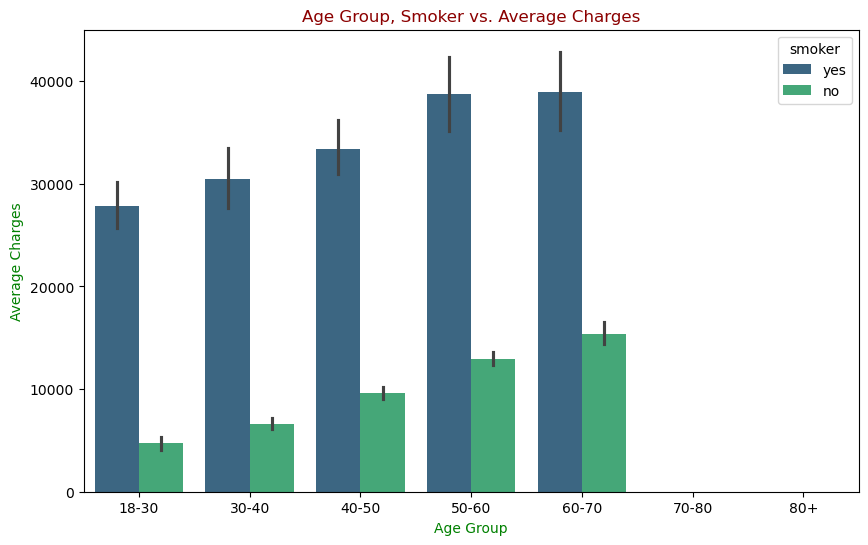

In [100]:
bins = [18, 30, 40, 50, 60, 70, 80, 100]
labels = ['18-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

print(df[['age', 'age_group']].head())

plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='charges', hue='smoker', data=df, palette='viridis')
plt.title('Age Group, Smoker vs. Average Charges', color='darkred')
plt.xlabel('Age Group', color='green')
plt.ylabel('Average Charges', color='green')
plt.show()

In [101]:
df.drop('age_group', axis=1, inplace=True)

In [148]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'smoker_bmi',
       'age_charges', 'age_group', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'BMI_Underweight', 'BMI_Normal',
       'BMI_Overweight', 'BMI_Obese'],
      dtype='object')

Feature Engineering

In [102]:
df['smoker_bmi'] = np.where(df['smoker'] == 1, df['bmi'], 0)


In [103]:
df['age_charges'] = df['age'] * df['charges']

In [104]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[17, 19, 35, 55, np.inf],
    labels=['Teenager', 'Young Adult', 'Middle-Aged Adult', 'Senior'] 
)

In [105]:
df['bmi_category'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 25, 30, np.inf],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese'] 
)

In [106]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_bmi', 'age_charges', 'age_group', 'bmi_category'],
      dtype='object')

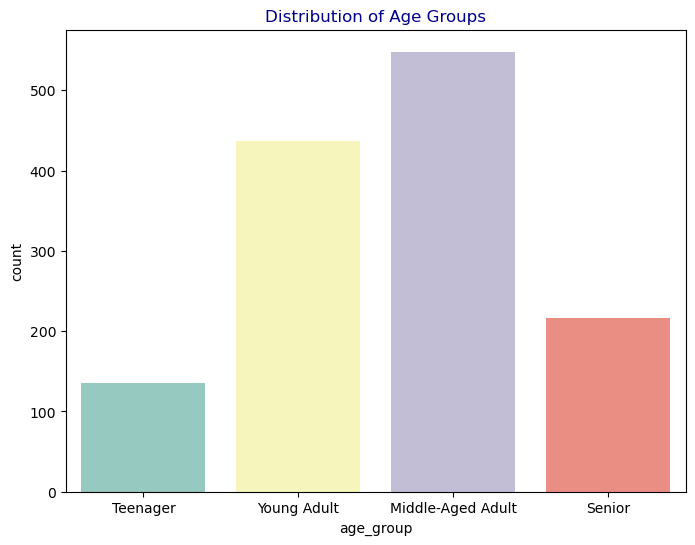

In [135]:
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', data=df, hue='age_group', palette='Set3', legend=False)
plt.title('Distribution of Age Groups', color='darkblue')
plt.show()

In [108]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [109]:
df['region'].value_counts()


region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [110]:
df = pd.get_dummies(df, columns=['region'], drop_first=False)

df = pd.get_dummies(df, columns=['bmi_category'], drop_first=False)


In [111]:

numerical_columns_to_standardize = ['age', 'bmi', 'smoker_bmi', 'age_charges']
numerical_columns_to_normalize = ['charges']

scaler = StandardScaler() 
normalizer = MinMaxScaler() 

df[numerical_columns_to_standardize] = scaler.fit_transform(df[numerical_columns_to_standardize])

df[numerical_columns_to_normalize] = normalizer.fit_transform(df[numerical_columns_to_normalize])


In [147]:
df.head()

,age,sex,bmi,children,smoker,charges,smoker_bmi,age_charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,BMI_Underweight,BMI_Normal,BMI_Overweight,BMI_Obese
0,-1.440418,1,-0.453160,0,1,0.251611,0.0,-0.425019,Teenager,False,False,False,True,False,False,True,False
1,-1.511647,0,0.509422,1,0,0.009636,0.0,-0.916206,Teenager,False,False,True,False,False,False,False,True
2,-0.799350,0,0.383155,3,0,0.053115,0.0,-0.757664,Young Adult,False,False,True,False,False,False,False,True
3,-0.443201,0,-1.305052,0,0,0.333010,0.0,0.260980,Young Adult,False,True,False,False,False,True,False,False
4,-0.514431,0,-0.292456,0,0,0.043816,0.0,-0.759097,Young Adult,False,True,False,False,False,False,True,False


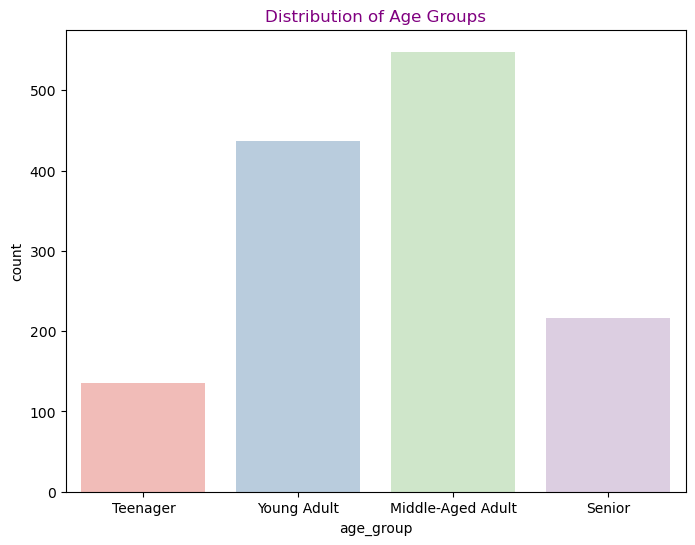

In [136]:
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', data=df, hue='age_group', palette='Pastel1', legend=False)
plt.title('Distribution of Age Groups', color='purple')
plt.show()

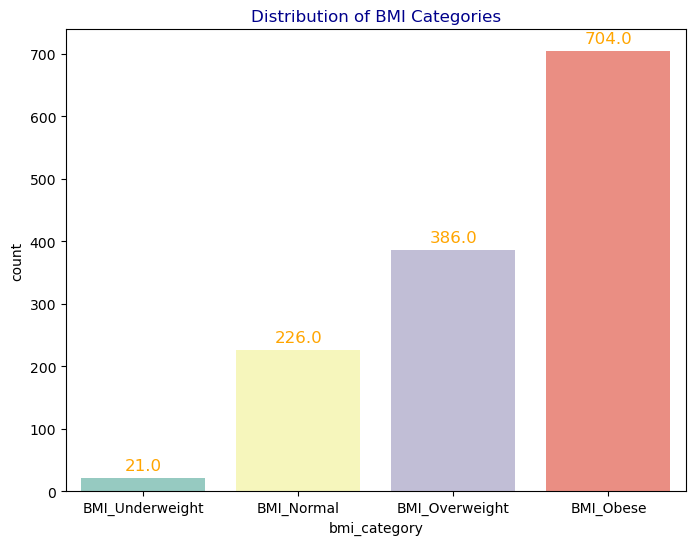

In [137]:
df.rename(columns={
    'bmi_category_Underweight': 'BMI_Underweight',
    'bmi_category_Normal': 'BMI_Normal',
    'bmi_category_Overweight': 'BMI_Overweight',
    'bmi_category_Obese': 'BMI_Obese'
}, inplace=True)

bmi_columns = ['BMI_Underweight', 'BMI_Normal', 'BMI_Overweight', 'BMI_Obese']

df_bmi_melted = df[bmi_columns].melt(var_name='bmi_category', value_name='count')

df_bmi_melted = df_bmi_melted[df_bmi_melted['count'] == 1]

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='bmi_category', data=df_bmi_melted, hue='bmi_category', palette='Set3', legend=False)
plt.title('Distribution of BMI Categories', color='darkblue')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='orange',
                xytext=(0, 9), textcoords='offset points')

plt.show()


In [114]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'smoker_bmi',
       'age_charges', 'age_group', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'BMI_Underweight', 'BMI_Normal',
       'BMI_Overweight', 'BMI_Obese'],
      dtype='object')

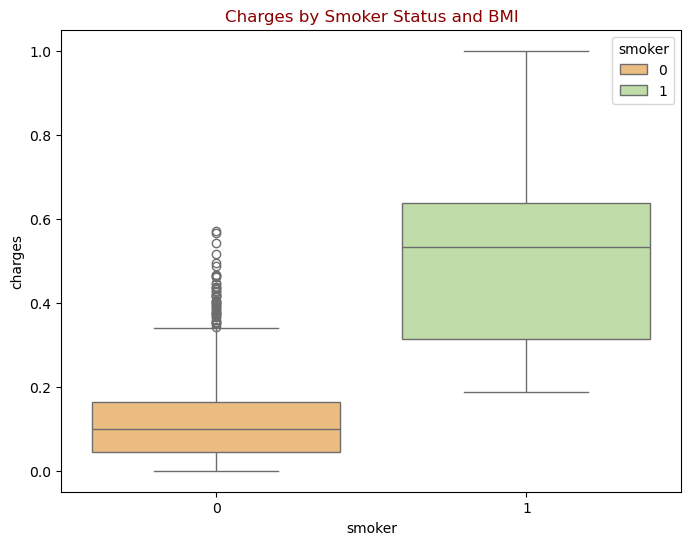

In [138]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df, hue='smoker', palette='Spectral')
plt.title('Charges by Smoker Status and BMI', color='darkred')
plt.show()

In [139]:
categorical_columns = ['age_group', 'region_northwest', 'region_southeast', 'region_southwest',
                       'BMI_Normal', 'BMI_Overweight', 'BMI_Obese']
numerical_columns = ['age', 'bmi', 'smoker_bmi', 'age_charges']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

In [140]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'smoker_bmi',
       'age_charges', 'age_group', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'BMI_Underweight', 'BMI_Normal',
       'BMI_Overweight', 'BMI_Obese'],
      dtype='object')

In [141]:
X = df.drop('charges', axis=1)
y = df['charges']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [121]:
rmse = root_mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
rmse , mae, r2

(0.064866542242983, 0.04451890598015979, 0.9101285143882243)

In [142]:
selector = RFE(pipeline.named_steps['regressor'], n_features_to_select=5)
X_transformed = preprocessor.fit_transform(X_train)
selector = selector.fit(X_transformed, y_train)

encoded_columns = preprocessor.transformers_[1][1].get_feature_names_out(categorical_columns)
all_columns = numerical_columns + list(encoded_columns)

print("Important Features (from RFE):", [all_columns[i] for i in range(len(all_columns)) if selector.support_[i]])

Important Features (from RFE): ['age', 'age_charges', 'age_group_Middle-Aged Adult', 'age_group_Teenager', 'BMI_Obese_False']


In [123]:
from sklearn.svm import SVR
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('regressor', SVR())
])

svr_pipeline.fit(X_train, y_train)

y_pred_svr = svr_pipeline.predict(X_test)

In [124]:


rmse_svr = root_mean_squared_error(y_test, y_pred_svr)

mae_svr = mean_absolute_error(y_test, y_pred_svr)

r2_svr = r2_score(y_test, y_pred_svr) 

rmse_svr, mae_svr, r2_svr


(0.08786331986745578, 0.07988809713406364, 0.8351094972742283)

In [125]:
result =permutation_importance(svr_pipeline, X_test, y_test, n_repeats=10, random_state=42)

importance = result.importances_mean

encoded_columns_svr = preprocessor.transformers_[1][1].get_feature_names_out(categorical_columns)
all_columns_svr = numerical_columns + list(encoded_columns_svr)

feature_importance = sorted(zip(all_columns_svr, importance), key=lambda x: x[1], reverse=True)

print("Most Important Features (from Permutation Importance for SVR):")
for feature, imp in feature_importance:
    print(f"{feature}: {imp}")


Most Important Features (from Permutation Importance for SVR):
age_group_Teenager: 1.6543928216750667
age: 0.18222696329520438
BMI_Normal_True: 0.029914458785212983
smoker_bmi: 0.029117486175171202
age_group_Young Adult: 0.02289093883493263
BMI_Normal_False: 0.011975214507694154
region_southwest_True: 0.008184361304961585
region_northwest_True: 0.002673336096042067
region_southeast_False: 0.002258307212826982
region_southeast_True: 0.0018703649425494185
bmi: 0.0
age_charges: 0.0
age_group_Middle-Aged Adult: 0.0
age_group_Senior: 0.0
region_northwest_False: 0.0
region_southwest_False: 0.0


In [126]:
rfr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('regressor', RandomForestRegressor())  
])

rfr_pipeline.fit(X_train, y_train)

y_pred_rfr = rfr_pipeline.predict(X_test)

In [127]:


rmse_rfr = root_mean_squared_error(y_test, y_pred_rfr) 

mae_rfr = mean_absolute_error(y_test, y_pred_rfr)

r2_rfr = r2_score(y_test, y_pred_rfr)

rmse_rfr, mae_rfr, r2_rfr


(0.024109750495941794, 0.007686919873877286, 0.9875844530511954)

In [128]:

result_rfr = permutation_importance(rfr_pipeline, X_test, y_test, n_repeats=10, random_state=42)

importance_rfr = result_rfr.importances_mean

encoded_columns_rfr = preprocessor.transformers_[1][1].get_feature_names_out(categorical_columns)
all_columns_rfr = numerical_columns + list(encoded_columns_rfr) 

feature_importance_rfr = sorted(zip(all_columns_rfr, importance_rfr), key=lambda x: x[1], reverse=True)

print("Most Important Features (from Permutation Importance for RFR):")
for feature, imp in feature_importance_rfr:
    print(f"{feature}: {imp}")


Most Important Features (from Permutation Importance for RFR):
age_group_Teenager: 2.135032747490544
age: 0.25778206009543875
BMI_Normal_True: 0.00695713329488401
age_group_Young Adult: 0.004413321718448082
smoker_bmi: 0.003756176960812285
BMI_Normal_False: 0.0003944358889700128
region_southeast_False: 0.00017777643630667583
region_southwest_True: 8.117009866482894e-05
region_southeast_True: 7.471417319616646e-05
bmi: 0.0
age_charges: 0.0
age_group_Middle-Aged Adult: 0.0
age_group_Senior: 0.0
region_northwest_False: 0.0
region_southwest_False: 0.0
region_northwest_True: -0.00014199924058447833


K-fold Cross Validation

In [151]:

linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

k = 5
scores_rmse = cross_val_score(linear_pipeline, X_train, y_train, scoring='neg_root_mean_squared_error', cv=k)
scores_mae = cross_val_score(linear_pipeline, X_train, y_train, scoring='neg_mean_absolute_error', cv=k)
scores_r2 = cross_val_score(linear_pipeline, X_train, y_train, scoring='r2', cv=k)

linear_results = {
    'RMSE Mean': -scores_rmse.mean(), 
    'RMSE Std': scores_rmse.std(),
    'MAE Mean': -scores_mae.mean(), 
    'MAE Std': scores_mae.std(),
    'R2 Mean': scores_r2.mean(),
    'R2 Std': scores_r2.std()
}

print("\nLinear Regression Cross-Validation Results:")
for metric, value in linear_results.items():
    print(f"{metric}: {value:.4f}")



Linear Regression Cross-Validation Results:
RMSE Mean: 0.0629
RMSE Std: 0.0052
MAE Mean: 0.0423
MAE Std: 0.0028
R2 Mean: 0.8857
R2 Std: 0.0180


In [152]:
X = df.drop('charges', axis=1)
y = df['charges']

X_encoded = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

svr = SVR(kernel='rbf')

k = 5

scores_rmse = cross_val_score(svr, X_scaled, y, cv=k, scoring='neg_root_mean_squared_error')
scores_mae = cross_val_score(svr, X_scaled, y, cv=k, scoring='neg_mean_absolute_error')
scores_r2 = cross_val_score(svr, X_scaled, y, cv=k, scoring='r2')

svr_results = {
    'RMSE Mean': -scores_rmse.mean(),
    'RMSE Std': scores_rmse.std(),
    'MAE Mean': -scores_mae.mean(),
    'MAE Std': scores_mae.std(),
    'R² Mean': scores_r2.mean(),
    'R² Std': scores_r2.std()
}

print("\nSupport Vector Regression - Cross-Validation Results:")
for metric, value in svr_results.items():
    print(f"{metric}: {value:.4f}")


Support Vector Regression - Cross-Validation Results:
RMSE Mean: 0.0857
RMSE Std: 0.0009
MAE Mean: 0.0803
MAE Std: 0.0006
R² Mean: 0.8026
R² Std: 0.0112


In [144]:
X = df.drop('charges', axis=1)
y = df['charges']

X_encoded = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

k = 5

scores_rmse = cross_val_score(rf, X_scaled, y, cv=k, scoring='neg_root_mean_squared_error')
scores_mae = cross_val_score(rf, X_scaled, y, cv=k, scoring='neg_mean_absolute_error')
scores_r2 = cross_val_score(rf, X_scaled, y, cv=k, scoring='r2')

rf_results = {
    'RMSE Mean': -scores_rmse.mean(),
    'RMSE Std': scores_rmse.std(),
    'MAE Mean': -scores_mae.mean(),
    'MAE Std': scores_mae.std(),
    'R² Mean': scores_r2.mean(),
    'R² Std': scores_r2.std()
}

print("\nRandom Forest Regressor - Cross-Validation Results:")
for metric, value in rf_results.items():
    print(f"{metric}: {value:.4f}")


Random Forest Regressor - Cross-Validation Results:
RMSE Mean: 0.0176
RMSE Std: 0.0040
MAE Mean: 0.0065
MAE Std: 0.0007
R² Mean: 0.9912
R² Std: 0.0040


Compare Models

In [153]:
results = {
    "Model": ["Random Forest", "Support Vector Regression", "Linear Regression"],
    "Mean RMSE": [0.0176, 0.0857, 0.0629],
    "Mean MAE": [0.0065, 0.0803, 0.0423],
    "Mean R²": [0.9912, 0.8026, 0.8857]
}
results_df = pd.DataFrame(results)
print(results_df)


                       Model  Mean RMSE  Mean MAE  Mean R²
0              Random Forest     0.0176    0.0065   0.9912
1  Support Vector Regression     0.0857    0.0803   0.8026
2          Linear Regression     0.0629    0.0423   0.8857


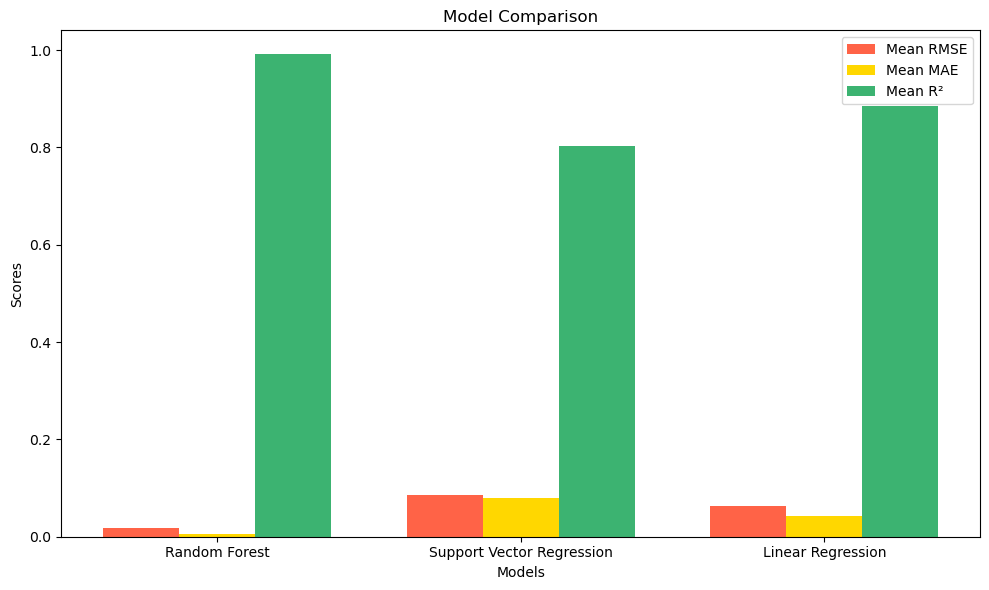

In [154]:
data = {
    "Model": ["Random Forest", "Support Vector Regression", "Linear Regression"],
    "Mean RMSE": [0.0176, 0.0857, 0.0629],
    "Mean MAE": [0.0065, 0.0803, 0.0434],
    "Mean R²": [0.9912, 0.8026, 0.8857]
}
results_df = pd.DataFrame(data)

def plot_model_comparison(results_df, colors=None):
    if colors is None:
        colors = {"RMSE": "tomato", "MAE": "gold", "R2": "mediumseagreen"}

    bar_width = 0.25
    index = np.arange(len(results_df))

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(index - bar_width, results_df["Mean RMSE"], bar_width, label="Mean RMSE", color=colors["RMSE"])
    ax.bar(index, results_df["Mean MAE"], bar_width, label="Mean MAE", color=colors["MAE"])
    ax.bar(index + bar_width, results_df["Mean R²"], bar_width, label="Mean R²", color=colors["R2"])

    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Model Comparison')
    ax.set_xticks(index)
    ax.set_xticklabels(results_df["Model"])
    ax.legend()

    plt.tight_layout()
    plt.show()

%matplotlib inline
plot_model_comparison(results_df)


Hyperparameter Tuning Using Grid CV

In [145]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_encoded, y)

print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 50}
